In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM_forestfire/Dataset/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [6]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM_forestfire/Dataset/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [8]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [9]:
model =Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [11]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [15]:
model.fit_generator(train_dataset,steps_per_epoch=14,epochs=5,validation_data=test_dataset,validation_steps=4)

Epoch 1/5
14/14 [==============================] - 90s 6s/step - loss: 0.6116 - accuracy: 0.5986 - val_loss: 0.4848 - val_accuracy: 0.5950
Epoch 2/5
14/14 [==============================] - 28s 2s/step - loss: 0.4310 - accuracy: 0.8028 - val_loss: 0.2826 - val_accuracy: 0.9339
Epoch 3/5
14/14 [==============================] - 30s 2s/step - loss: 0.2656 - accuracy: 0.8876 - val_loss: 0.1019 - val_accuracy: 0.9587
Epoch 4/5
14/14 [==============================] - 28s 2s/step - loss: 0.1647 - accuracy: 0.9289 - val_loss: 0.0457 - val_accuracy: 0.9917
Epoch 5/5
14/14 [==============================] - 27s 2s/step - loss: 0.1569 - accuracy: 0.9312 - val_loss: 0.0444 - val_accuracy: 0.9917


In [16]:
model.save("forest1.h5")

In [17]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [18]:
predictions


array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [19]:
print(len(predictions))

121


In [20]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [22]:
#load the saved model
model = load_model("forest1.h5")

In [23]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [24]:
predictImage("/content/drive/MyDrive/IBM_forestfire/Dataset/Dataset/test_set/with fire/Forest_Fire (3).jpg")

1/1 [==============================] - 0s 95ms/step
[[1.]]
 fire


In [25]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [26]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=b08f04be58231cd52000df8f0a30e87756a886d3a91d9cf257d6c92b0f95e7ee
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [27]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [28]:
#load the saved model
model = load_model(r'forest1.h5')
#define video
video = cv2.VideoCapture('/content/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
#define the features
name = ['forest','with forest']

In [31]:
account_sid='AC882fb904c019982a8338bfce6209f0b7'
auth_token='69359c9ed0bffcfd52e1d316866304e2'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
      body='Forest Fire is detected, stay alert',
      from_='+18318513711',
      to='+91 89397 68258'
)
print(message.sid)

SM998b12b547d0a66a4e3e6a91f35c1ae8


In [32]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='AC882fb904c019982a8338bfce6209f0b7'
    auth_token='69359c9ed0bffcfd52e1d316866304e2'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+18318513711',
        #to number
        to='+91 89397 68258')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 113ms/step


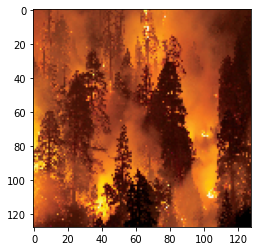

Forest fire
SMaeb4c53e92b0b5f96f7e980d5b542d97
Fire detected
SMS Sent!


In [34]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/IBM_forestfire/Dataset/Dataset/test_set/with fire/Wild_fires.jpg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

1/1 [==============================] - 0s 28ms/step


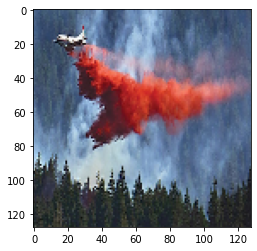

Forest fire
SM9632f5d5022c8ab7dabb0897438aeea0
Fire detected
SMS Sent!


In [35]:
img2 = image.load_img('/content/drive/MyDrive/IBM_forestfire/Dataset/Dataset/test_set/with fire/horseshoe_bay_fire.jpg',target_size=(128,128))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)